# The Impact of Screen Time on Mental Health

## Introduction

As a student currently studying psychology, I’m particularly interested in understanding how factors like screen time can impact mental health. In our tech-driven society, people are increasingly connected to their devices, and this constant connection might have unseen effects on mental well-being. Given how integral technology has become to our daily lives, it’s essential to explore how screen time may influence mental health across different age groups.

This analysis will focus on examining the relationship between technology usage and mental health indicators such as stress, anxiety, and depression. By studying how screen time affects people at different life stages, I hope to contribute insights into how digital habits might support or strain mental well-being. This topic feels especially meaningful in light of our increasing reliance on technology, as understanding these impacts can inform healthier digital practices and potentially guide age-specific recommendations for mental health.

## Background or Related Work

Research has consistently shown links between screen time and mental health issues, particularly among adolescents and young adults. Studies have found that greater screen use is often associated with symptoms of depression, anxiety, and stress. However, the impact varies based on the type of screen use, duration, and demographic factors like age and gender.

- **A study published in Frontiers in Psychology** examined the relationship between screen time and addictive behaviors related to gaming and social media. They found that while screen time itself was linked to addictive symptoms, it was primarily the negative effects of excessive use, such as disrupted sleep and mood changes, that were associated with mental health issues. (https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2023.1258784/full)
- **A study by Yale and Columbia researchers**, using data from the Adolescent Brain Cognitive Development (ABCD) Study, revealed that 9- and 10-year-olds who spent more time on screens were more likely to experience symptoms of depression and anxiety over a two-year period. These changes were partly related to alterations in brain development associated with frequent screen use. (https://medicine.yale.edu/news-article/yale-study-probes-connection-between-excessive-screen-media-activity-and-mental-health-problems-in-youth/)
- **A systematic review published in BMC Psychology** found that excessive screen time in adolescents was often associated with mental health challenges, with social media use linked to lower well-being and, particularly for girls, a higher risk of depression. (https://bmcpsychology.biomedcentral.com/articles/10.1186/s40359-023-01166-7)

These findings emphasize the importance of examining different types of technology use and considering age and gender differences. Building on this research, my study will focus on specific types of screen time and age group comparisons to provide a more detailed look at how screen time affects mental health.

## Research Questions
1. **Primary Question:** How does screen time correlate with self-reported stress levels across different age groups?
2. **Secondary Question:** How do social media and gaming activities correlate with self-reported mental health outcomes?
3. **Exploratory Question:** How does the relationship between technology usage and mental health differ by gender?

## Methodology

### Data Description
- **Dataset:** "Mental Health and Technology Usage" from Kaggle.
- **Key Variables**:
  - `Age`, `Gender`, `Screen_Time_Hours`, `Social_Media_Usage_Hours`, `Gaming_Hours`
  - `Mental_Health_Status`, `Stress_Level`, `Sleep_Hours`, `Physical_Activity_Hours`
- **License:** Apache 2.0, allowing for non-commercial use.
- **Ethical Considerations**: As self-reported data, there may be biases in responses or inaccuracies.

### Data Cleaning
1. Removed missing and inconsistent values.
2. Encoded categorical variables (e.g., Mental Health Status) into numeric values for analysis.
3. Created additional variables such as `Screen_Time_Groups` and age bins.

### Analytical Methods
1. **Correlation Analysis:** Explored relationships between variables like screen time and stress.
2. **Visualization Techniques:** Leveraged scatter plots, boxplots, and comparative bar graphs.
3. **Stratification by Demographics:** Examined results across age groups and gender.

### Code Cell: Data Cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
file_path = "mental_health_and_technology_usage_2024.csv"
df = pd.read_csv(file_path)

# Handle missing values
df_cleaned = df.fillna({
    'Technology_Usage_Hours': df['Technology_Usage_Hours'].mean(),
    'Social_Media_Usage_Hours': df['Social_Media_Usage_Hours'].mean(),
    'Gaming_Hours': df['Gaming_Hours'].mean(),
    'Screen_Time_Hours': df['Screen_Time_Hours'].mean(),
    'Sleep_Hours': df['Sleep_Hours'].mean(),
    'Physical_Activity_Hours': df['Physical_Activity_Hours'].mean()
})

# Map Stress_Level to numeric values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_cleaned['Stress_Level_Numeric'] = df_cleaned['Stress_Level'].map(stress_mapping)

# Create age groups
age_bins = [0, 18, 35, 55, 100]
age_labels = ['Teens', 'Young Adults', 'Middle-Aged', 'Seniors']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels)

# Categorize Screen Time into 'High' and 'Low'
df_cleaned['Screen_Time_Group'] = df_cleaned['Screen_Time_Hours'].apply(
    lambda x: 'High' if x > df_cleaned['Screen_Time_Hours'].median() else 'Low'
)

### Visualization 1: Stress Levels vs. Screen Time by Age Group
**Purpose:**  
This scatter plot with regression lines shows how screen time correlates with stress levels across different age groups. By visualizing the data in this way, we can observe if screen time has a stronger impact on stress levels in specific age demographics.

**What It Shows:**  
- X-axis: Hours of screen time.
- Y-axis: Numeric representation of stress levels (1: Low, 2: Medium, 3: High).
- Regression lines for each age group indicate trends in stress levels with varying screen time.

**Expected Insights:**  
This graph will help to identify whether certain age groups (e.g., teens, young adults) are more sensitive to increased screen time in terms of stress levels.

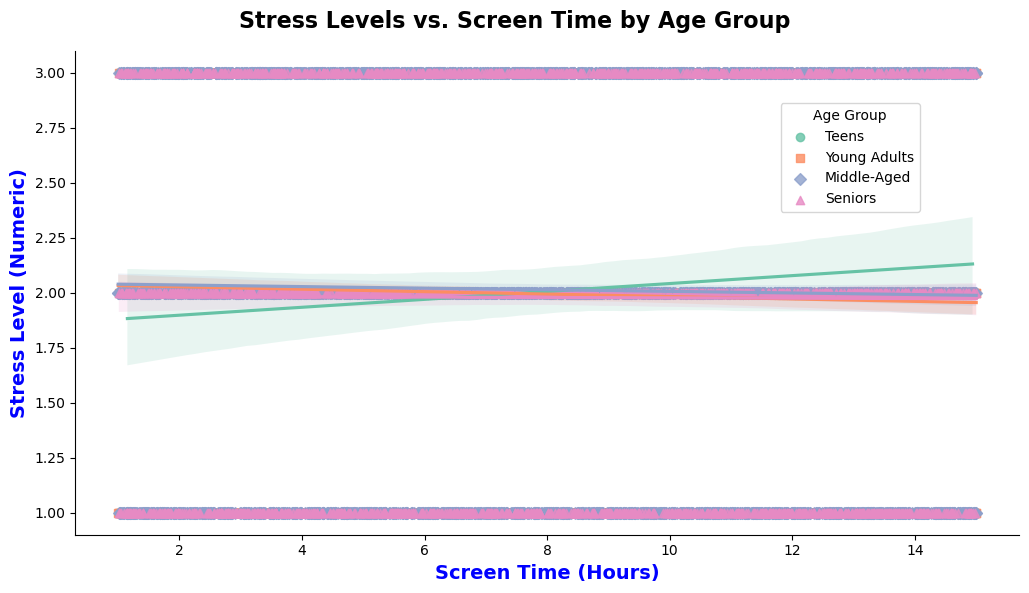

In [3]:
# Scatter Plot with Regression Lines
scatter_plot = sns.lmplot(
    x='Screen_Time_Hours', 
    y='Stress_Level_Numeric', 
    hue='Age_Group',
    data=df_cleaned, 
    palette='Set2', 
    height=6, 
    aspect=1.5, 
    markers=['o', 's', 'D', '^']
)

# Customize labels and title
scatter_plot.set_axis_labels(
    'Screen Time (Hours)', 'Stress Level (Numeric)', 
    fontsize=14, fontweight='bold', color='blue'
)
scatter_plot.fig.suptitle(
    'Stress Levels vs. Screen Time by Age Group', 
    fontsize=16, fontweight='bold'
)

# Move the legend to specific coordinates
scatter_plot._legend.set_bbox_to_anchor((14 / scatter_plot.ax.get_xlim()[1], 
                                         2.25 / scatter_plot.ax.get_ylim()[1]))
scatter_plot._legend.set_title('Age Group')  # Add title to the legend
scatter_plot._legend.set_frame_on(True)  # Add a frame for clarity

plt.tight_layout()
plt.show()

### Visualization 2: Comparison of Social Media and Gaming Hours by Mental Health Status
**Purpose:**  
This grouped boxplot compares the distribution of social media usage hours and gaming hours for individuals with different mental health statuses. The goal is to identify which activity correlates more strongly with negative or positive mental health outcomes.

**What It Shows:**  
- X-axis: Mental health status categories (Poor, Fair, Good, Excellent).
- Y-axis: Hours spent on social media and gaming.
- Two categories for comparison: Social Media Usage Hours and Gaming Hours.

**Expected Insights:**  
I expect to observe whether higher usage of either social media or gaming is more prevalent in individuals reporting "Poor" mental health compared to "Good" or "Excellent" mental health statuses.

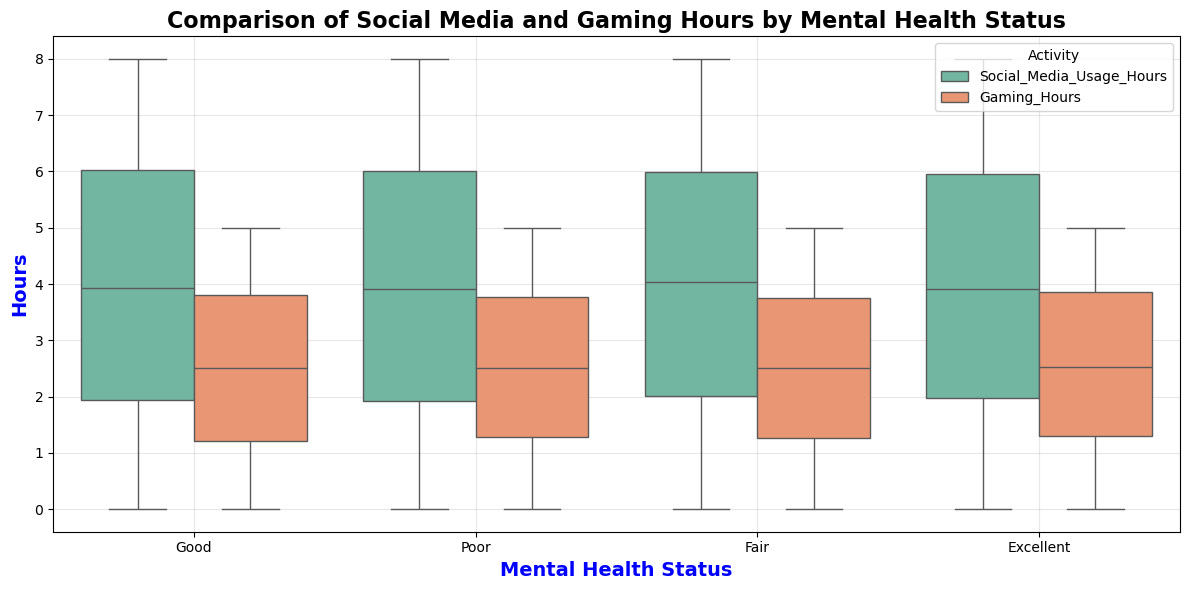

In [4]:
# Prepare the data for boxplot
melted_data = df_cleaned.melt(
    id_vars='Mental_Health_Status',
    value_vars=['Social_Media_Usage_Hours', 'Gaming_Hours'],
    var_name='Activity',
    value_name='Hours'
)

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Mental_Health_Status',
    y='Hours',
    hue='Activity',
    data=melted_data,
    palette='Set2'
)
plt.xlabel('Mental Health Status', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Hours', fontsize=14, fontweight='bold', color='blue')
plt.title('Comparison of Social Media and Gaming Hours by Mental Health Status', fontsize=16, fontweight='bold')
plt.legend(title='Activity', loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Visualization 3: Technology Usage vs. Mental Health Status by Gender
**Purpose:**  
This grouped bar chart compares technology usage hours by gender for each mental health status.

**What It Shows:**  
- X-axis: Mental health status (ordered as Poor, Fair, Good, Excellent).
- Y-axis: Technology usage hours.
- Bars are grouped by gender for comparative analysis.

**Expected Insights:**  
This visualization highlights potential differences in technology usage based on gender and mental health status.

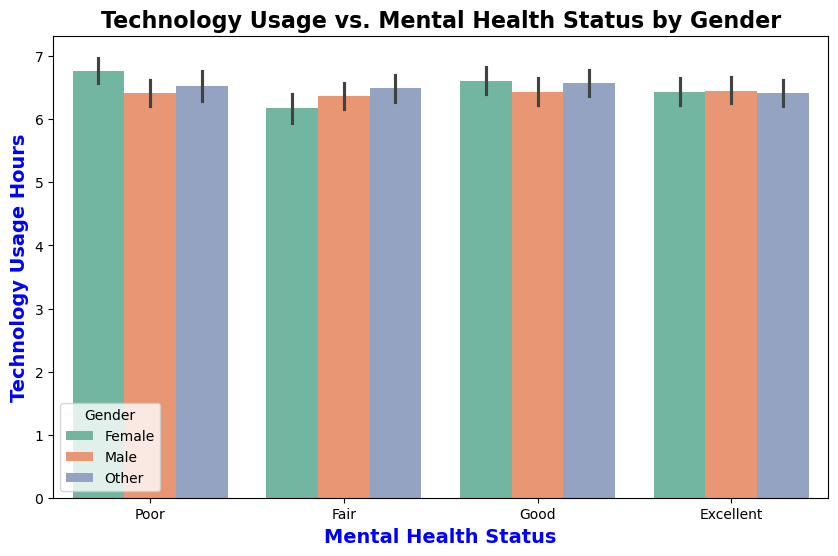

In [5]:
mental_health_order = ['Poor', 'Fair', 'Good', 'Excellent']

# Convert Mental_Health_Status to a categorical type with the specified order
df_cleaned['Mental_Health_Status'] = pd.Categorical(
    df_cleaned['Mental_Health_Status'], categories=mental_health_order, ordered=True
)

# Bar plot for technology usage by gender
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Mental_Health_Status', 
    y='Technology_Usage_Hours', 
    hue='Gender', 
    data=df_cleaned, 
    palette='Set2'
)

# Customize appearance
plt.xlabel("Mental Health Status", fontsize=14, fontweight='bold', color='blue')
plt.ylabel("Technology Usage Hours", fontsize=14, fontweight='bold', color='blue')
plt.title("Technology Usage vs. Mental Health Status by Gender", fontsize=16, fontweight='bold')
plt.legend(title="Gender")
plt.show()

### Findings

Here’s what I found from analyzing the dataset:

1. **Screen Time and Mental Health**  
   - People with more screen time reported higher levels of stress overall.  
   - This was especially noticeable in younger age groups, like teens.

2. **Impact of Screen Time Activities**  
   - Among screen time activities, social media usage showed stronger correlation with negative mental health outcomes

3. **Trends Across Ages**  
   - Teens (13–17 years old) reported the biggest mental health challenges tied to screen time  
   - Middle-aged and seniors (35+ years) were less affected overall

4. **Gender Differences**  
   - Females were more affected by social media use compared to males, particularly in mental health status.

---

### Discussion

#### Limitations
1. **Self-Reporting**  
   The dataset depends on people reporting their own habits and feelings, so there might be some inaccuracies in how much time they spend on screens or how they rate their mental health.

2. **Correlation, Not Causation**  
   The study shows patterns but doesn’t prove that screen time causes mental health issues. Other factors, like life stress or pre-existing conditions, could play a role too.

3. **Dataset Scope**  
   The dataset might not represent everyone equally, especially people from different backgrounds or regions, which makes it harder to generalize the results.

#### Implications
1. **Health Awareness**  
   - This research highlights the need to focus on mental health, especially for teens and young adults who use a lot of social media.  
   - Programs that promote healthy screen time habits could be valuable.

2. **Better Platform Design**  
   - Social media apps could include features that encourage taking breaks or provide mental health resources.  
   - Gaming platforms could help users track their time to avoid overuse.

3. **Future Research**  
   - It would be helpful to study long-term effects to understand if screen time directly causes mental health changes.  
   - Research into practical solutions, like digital detoxes or mindfulness apps, could also be useful.

---

### Conclusion

This project looked at how screen time affects mental health and found that teens and young adults seem to be the most impacted, especially by social media. Social media use was linked to stress level, while gaming showed mixed effects depending on how much time people spent on it.  

These findings suggest that promoting healthier digital habits and creating more supportive online environments could make a big difference. It’s clear that this is an important area for ongoing research and public awareness, especially as technology continues to be such a big part of our daily lives.